In [1]:
greetings = "Assalam-o-Alaikum!"
print(greetings)

Assalam-o-Alaikum!


### Import Libraries

In [82]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Bagging

In [3]:
# Import Dataset
from sklearn.datasets import load_breast_cancer

In [4]:
data = load_breast_cancer()

In [5]:
# Features
X = data.data
X = pd.DataFrame(X)
X.columns = data.feature_names
X.T

,0,1,2,3,4,5,6,7,8,9,...,559,560,561,562,563,564,565,566,567,568
mean radius,17.990000,20.570000,19.690000,11.420000,20.290000,12.450000,18.250000,13.710000,13.000000,12.460000,...,11.510000,14.050000,11.200000,15.220000,20.920000,21.560000,20.130000,16.600000,20.600000,7.760000
mean texture,10.380000,17.770000,21.250000,20.380000,14.340000,15.700000,19.980000,20.830000,21.820000,24.040000,...,23.930000,27.150000,29.370000,30.620000,25.090000,22.390000,28.250000,28.080000,29.330000,24.540000
mean perimeter,122.800000,132.900000,130.000000,77.580000,135.100000,82.570000,119.600000,90.200000,87.500000,83.970000,...,74.520000,91.380000,70.670000,103.400000,143.000000,142.000000,131.200000,108.300000,140.100000,47.920000
mean area,1001.000000,1326.000000,1203.000000,386.100000,1297.000000,477.100000,1040.000000,577.900000,519.800000,475.900000,...,403.500000,600.400000,386.000000,716.900000,1347.000000,1479.000000,1261.000000,858.100000,1265.000000,181.000000
mean smoothness,0.118400,0.084740,0.109600,0.142500,0.100300,0.127800,0.094630,0.118900,0.127300,0.118600,...,0.092610,0.099290,0.074490,0.104800,0.109900,0.111000,0.097800,0.084550,0.117800,0.052630
mean compactness,0.277600,0.078640,0.159900,0.283900,0.132800,0.170000,0.109000,0.164500,0.193200,0.239600,...,0.102100,0.112600,0.035580,0.208700,0.223600,0.115900,0.103400,0.102300,0.277000,0.043620
mean concavity,0.300100,0.086900,0.197400,0.241400,0.198000,0.157800,0.112700,0.093660,0.185900,0.227300,...,0.111200,0.044620,0.000000,0.255000,0.317400,0.243900,0.144000,0.092510,0.351400,0.000000
mean concave points,0.147100,0.070170,0.127900,0.105200,0.104300,0.080890,0.074000,0.059850,0.093530,0.085430,...,0.041050,0.043040,0.000000,0.094290,0.147400,0.138900,0.097910,0.053020,0.152000,0.000000
mean symmetry,0.241900,0.181200,0.206900,0.259700,0.180900,0.208700,0.179400,0.219600,0.235000,0.203000,...,0.138800,0.153700,0.106000,0.212800,0.214900,0.172600,0.175200,0.159000,0.239700,0.158700
mean fractal dimension,0.078710,0.056670,0.059990,0.097440,0.058830,0.076130,0.057420,0.074510,0.073890,0.082430,...,0.065700,0.061710,0.055020,0.071520,0.068790,0.056230,0.055330,0.056480,0.070160,0.058840


In [6]:
# Target
y = data["target"]
y[::50]

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1])

In [7]:
# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size = 0.3,
                                                    stratify = y,
                                                    random_state = 42)

# Parameters
parameters = {"max_depth": np.arange(1, 10),
              "min_samples_leaf": np.linspace(0, 1, 110).round(2)}


# Decision Tree Classifier Object
dt = DecisionTreeClassifier(random_state = 42)

# Grid Search Cross Validation Object
cv = GridSearchCV(dt, parameters, cv = 5)


# Fit Training Data into Model
cv.fit(x_train, y_train)

print("Best CV parameters =", cv.best_params_)
print("Best CV accuracy =", cv.best_score_)

Best CV parameters = {'max_depth': 2, 'min_samples_leaf': 0.03}
Best CV accuracy = 0.9423417721518987


**Bagging Classifier**

In [8]:
# Instantiate a classification-tree
dt = DecisionTreeClassifier(max_depth = 2, min_samples_leaf = 0.03, random_state = 42)

# Instantiate a Bagging-Classifier
bc = BaggingClassifier(base_estimator = dt, n_estimators = 300, n_jobs = -1)

# Fit "bc" to training set
bc.fit(x_train, y_train)

# Predict the test labels
y_pred = bc.predict(x_test)

# Evaluate and print test-set accuracy
accuracy = accuracy_score(y_test, y_pred)

# Accuracy of Bagging Classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Bagging Classifier =", accuracy)

Accuracy of Bagging Classifier = 0.9181286549707602


**Liver Patient Datset**

In [9]:
# Import Dataset
df = pd.read_csv("ILPD.csv")
df[::40]

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,1
40,45,Male,2.4,1.1,168,33,50,5.1,2.6,1.0,1
80,58,Female,2.4,1.1,915,60,142,4.7,1.8,0.6,1
120,32,Male,23.0,11.3,300,482,275,7.1,3.5,0.9,1
160,60,Male,11.0,4.9,750,140,350,5.5,2.1,0.6,1
200,49,Male,0.6,0.1,218,50,53,5.0,2.4,0.9,1
240,48,Male,0.7,0.2,165,32,30,8.0,4.0,1.0,2
280,58,Male,0.8,0.2,123,56,48,6.0,3.0,1.0,1
320,30,Female,0.7,0.2,63,31,27,5.8,3.4,1.4,1
360,24,Male,0.7,0.2,218,47,26,6.6,3.3,1.0,1


In [10]:
# Drop Null Values
df = df.dropna()

In [11]:
# Get Dummy Variables
df = pd.get_dummies(df)

In [12]:
# Feature
X = df[df.columns.drop("is_patient")]

# Target
y = df["is_patient"]

In [13]:
# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 42)

# Instantiate dt
dt = DecisionTreeClassifier()

# Parameters
parameters = {"max_depth": np.arange(1, 10),
              "min_samples_leaf": np.linspace(0, 1, 110).round(2)}

# Cross Validation
cv = GridSearchCV(dt, parameters)

# Fit into Model
cv.fit(x_train, y_train)

print("Best CV Parameters =", cv.best_params_)
print("Best CV Accuracy =", cv.best_score_)

Best CV Parameters = {'max_depth': 6, 'min_samples_leaf': 0.03}
Best CV Accuracy = 0.7432098765432099


In [14]:
# Fit Best Parameters into decision tree object
dt = DecisionTreeClassifier(max_depth = 6, min_samples_leaf = 0.03, random_state = 42)

# Instantiate Bagging Classifier oject with features
bc = BaggingClassifier(base_estimator = dt, n_estimators = 300, random_state = 42, n_jobs = -1)

# Fit data into model
bc.fit(x_train, y_train)

# Prediction
y_pred = bc.predict(x_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Model =", accuracy)

Accuracy of Model = 0.6436781609195402


# Random Forest

**auto dataset**

In [15]:
# Import Dataset
df = pd.read_csv("auto.csv")
df[::50]

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
50,12.0,383.0,180,4955,11.5,US,20.0
100,20.0,130.0,102,3150,15.7,Europe,10.0
150,13.0,350.0,165,4274,12.0,US,20.0
200,19.0,232.0,90,3211,17.0,US,15.0
250,20.0,198.0,95,3102,16.5,US,15.0
300,18.0,121.0,112,2933,14.5,Europe,10.0
350,13.0,302.0,130,3870,15.0,US,20.0


In [16]:
# Dummy Variables
df = pd.get_dummies(df)

In [17]:
df[::60]

,mpg,displ,hp,weight,accel,size,origin_Asia,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,0,1
60,31.0,71.0,65,1773,19.0,10.0,1,0,0
120,27.0,101.0,83,2202,15.3,10.0,0,1,0
180,38.0,262.0,85,3015,17.0,15.0,0,0,1
240,25.4,183.0,77,3530,20.1,12.5,0,1,0
300,18.0,121.0,112,2933,14.5,10.0,0,1,0
360,24.0,200.0,81,3012,17.6,15.0,0,0,1


In [18]:
#Features
X = df[df.columns.drop(["origin_Asia", "origin_Europe", "origin_US"])]

# Target
y = df["origin_US"]

In [19]:
# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 42)

In [20]:
# Random Frest Classifier Object
rf = RandomForestClassifier(n_estimators = 400,
                           min_samples_leaf = 0.12,
                           random_state = 42)

# Fit data into training model
rf.fit(x_train, y_train)

# Prediction
y_pred = rf.predict(x_test)

# Score
score = accuracy_score(y_test, y_pred)
score

0.847457627118644

**Feature Importance**

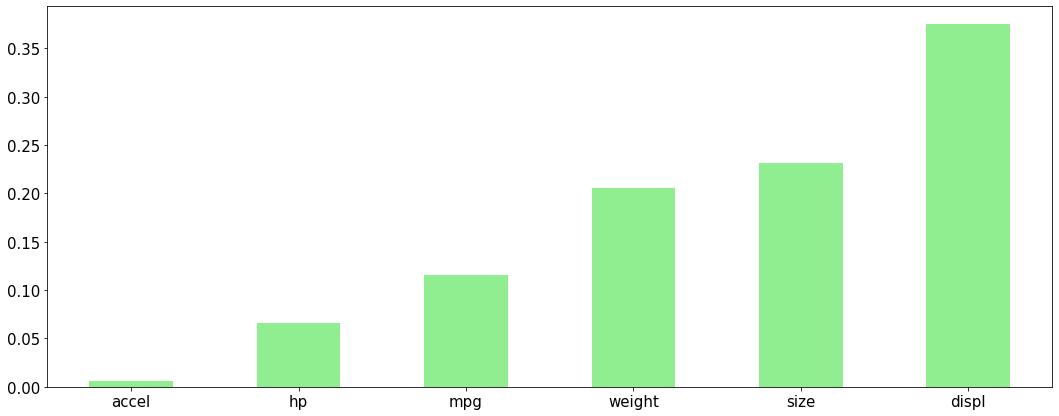

In [21]:
# Create a pd.Series of features importance
importance_rf = pd.Series(rf.feature_importances_, index = X.columns)
importance_rf = importance_rf.sort_values()
importance_rf.plot(kind = "bar", color = "lightgreen", figsize = (18, 7))
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.show()

**Bike Sharing Demand dataset**

In [56]:
# TRraining Set
train = pd.read_csv("train.csv")
train[::1000]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1000,2011-03-06 03:00:00,1,0,0,2,17.22,21.210,82,19.9995,2,9,11
2000,2011-05-10 06:00:00,2,0,1,1,17.22,21.210,67,8.9981,9,103,112
3000,2011-07-13 22:00:00,3,0,1,1,27.88,31.820,83,12.9980,48,136,184
4000,2011-09-17 17:00:00,3,0,0,1,21.32,25.000,72,15.0013,141,218,359
5000,2011-12-02 10:00:00,4,0,1,1,12.30,14.395,75,15.0013,16,89,105
6000,2012-02-06 06:00:00,1,0,1,1,6.56,9.090,86,7.0015,0,72,72
7000,2012-04-10 00:00:00,2,0,1,2,18.04,21.970,47,19.0012,3,23,26
8000,2012-06-13 17:00:00,2,0,1,1,29.52,32.575,32,32.9975,75,782,857
9000,2012-08-17 09:00:00,3,0,1,1,28.70,12.120,58,7.0015,58,320,378


In [57]:
# Test Set
test = pd.read_csv("test.csv")
test[::1000]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1000,2011-04-30 16:00:00,2,0,0,1,23.78,27.275,37,12.9980
2000,2011-08-26 08:00:00,3,0,1,1,27.06,30.305,83,7.0015
3000,2011-12-22 14:00:00,1,0,1,2,18.86,22.725,63,0.0000
4000,2012-03-30 12:00:00,2,0,1,2,15.58,19.695,54,0.0000
5000,2012-07-26 04:00:00,3,0,1,1,27.06,31.060,74,12.9980
6000,2012-11-22 08:00:00,4,1,0,1,9.84,12.120,75,8.9981


In [58]:
# Extract Information from datetime column of train set
train["hour"] = [t.hour for t in pd.DatetimeIndex(train.datetime)]

train["day"] = [t.dayofweek for t in pd.DatetimeIndex(train.datetime)]

train["month"] = [t.month for t in pd.DatetimeIndex(train.datetime)]

train["year"] = [t.year for t in pd.DatetimeIndex(train.datetime)]

train["year"] = train['year'].map({2011:0, 2012:1})

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,5,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,1,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,5,1,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,5,1,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,5,1,0


In [59]:
# Extract Information from datetime column of test set
test["hour"] = [t.hour for t in pd.DatetimeIndex(test.datetime)]

test["day"] = [t.dayofweek for t in pd.DatetimeIndex(test.datetime)]

test["month"] = [t.month for t in pd.DatetimeIndex(test.datetime)]

test["year"] = [t.year for t in pd.DatetimeIndex(test.datetime)]

test["year"] = test['year'].map({2011:0, 2012:1})

test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,day,month,year
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0,3,1,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,3,1,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2,3,1,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,3,3,1,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,4,3,1,0


In [60]:
# Delete unnecessary from datetime column of train set
train = train[train.columns.drop(["datetime", "casual", "registered"])]

In [61]:
# Delete unnecessary from datetime column of test set
test = test[test.columns.drop(["datetime"])]

In [62]:
# Create dummy variables of weather from train set
weather = pd.get_dummies(train["weather"], prefix = "weather")
train = pd.concat([train, weather], axis = 1)

# Create dummy variables of weather from test set
weather = pd.get_dummies(test["weather"], prefix = "weather")
test = pd.concat([test, weather], axis = 1)

In [63]:
# Create dummy variables of season from test set
season = pd.get_dummies(train["season"], prefix = "season")
train = pd.concat([train, season], axis = 1)

# Create dummy variables of season from test set
season = pd.get_dummies(test["season"], prefix = "season")
test = pd.concat([test, season], axis = 1)

In [64]:
# Drop columns from train set
train = train[train.columns.drop(["season", "weather"])]

In [65]:
# Drop columns from test set
test = test[test.columns.drop(["season", "weather"])]

In [66]:
train = train.rename(columns = {"weather_1": "Clear Weather",
                                "weather_2": "Cloudy Weather",
                                "weather_3": "Rainy Weather",
                                "weather_4": "Extreme Weather",
                                "season_1": "Spring",
                                "season_2": "Summer",
                                "season_3": "Autumn",
                                "season_4": "Winter"})
train[::2000]

,holiday,workingday,temp,atemp,humidity,windspeed,count,hour,day,month,year,Clear Weather,Cloudy Weather,Rainy Weather,Extreme Weather,Spring,Summer,Autumn,Winter
0,0,0,9.84,14.395,81,0.0000,16,0,5,1,0,1,0,0,0,1,0,0,0
2000,0,1,17.22,21.210,67,8.9981,112,6,1,5,0,1,0,0,0,0,1,0,0
4000,0,0,21.32,25.000,72,15.0013,359,17,5,9,0,1,0,0,0,0,0,1,0
6000,0,1,6.56,9.090,86,7.0015,72,6,0,2,1,1,0,0,0,1,0,0,0
8000,0,1,29.52,32.575,32,32.9975,857,17,2,6,1,1,0,0,0,0,1,0,0
10000,0,1,13.12,15.910,66,11.0014,24,1,4,11,1,1,0,0,0,0,0,0,1


In [68]:
test = test.rename(columns = {"weather_1": "Clear Weather",
                              "weather_2": "Cloudy Weather",
                              "weather_3": "Rainy Weather",
                              "weather_4": "Extreme Weather",
                              "season_1": "Spring",
                              "season_2": "Summer",
                              "season_3": "Autumn",
                              "season_4": "Winter"})
test[::2000]

,holiday,workingday,temp,atemp,humidity,windspeed,hour,day,month,year,Clear Weather,Cloudy Weather,Rainy Weather,Extreme Weather,Spring,Summer,Autumn,Winter
0,0,1,10.66,11.365,56,26.0027,0,3,1,0,1,0,0,0,1,0,0,0
2000,0,1,27.06,30.305,83,7.0015,8,4,8,0,1,0,0,0,0,0,1,0
4000,0,1,15.58,19.695,54,0.0000,12,4,3,1,0,1,0,0,0,1,0,0
6000,1,0,9.84,12.120,75,8.9981,8,3,11,1,1,0,0,0,0,0,0,1


In [69]:
# Features
X = train[train.columns.drop("count")]

# Target
y = train["count"]

In [74]:
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 5)
# Random Forest
rf = RandomForestRegressor(n_estimators = 25, random_state = 2)

# Fit cv into training set
rf.fit(x_train, y_train)

# Prediction
y_pred = rf.predict(x_test)

# Comparison
pd.DataFrame({"Actual": y_test, "Predicted": y_pred})[::300]

,Actual,Predicted
3650,87,101.12
8254,343,439.68
2908,96,72.80
6051,253,234.24
5811,93,408.24
7313,11,15.80
8131,10,6.60
9692,19,27.04


In [88]:
rmse = mean_squared_error(y_test, y_pred)**(1/2)
rmse

41.08445674758595

### Visualizing features importances

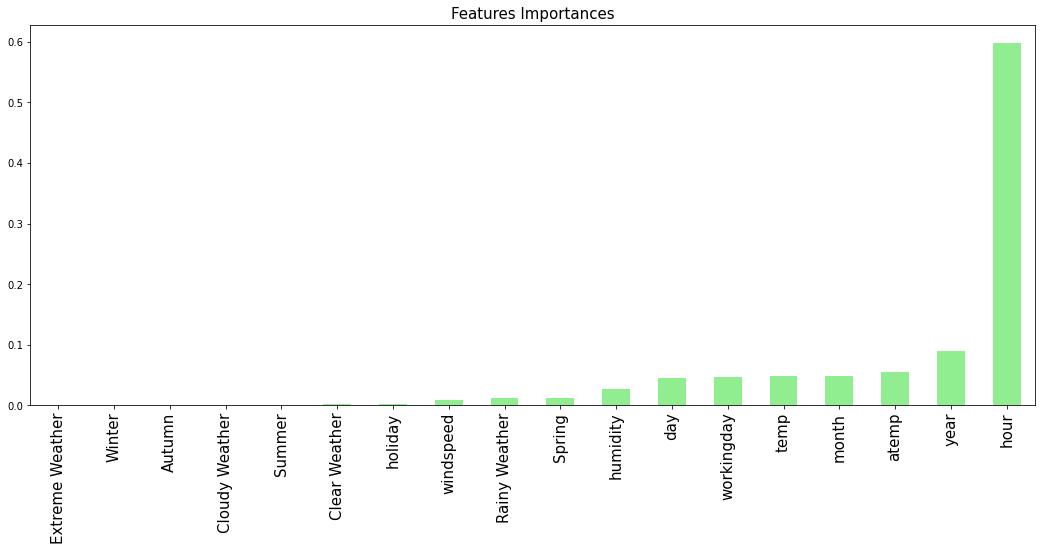

In [93]:
# Create a pd.Series of features importances
importances = pd.Series(data = rf.feature_importances_, index = x_train.columns)

# Sort Importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot
importances_sorted.plot(kind = "bar", color = "lightgreen", figsize = (18, 7))
plt.title("Features Importances", size = 15)
plt.xticks(size = 15)
plt.show()